In [1]:
%%capture
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import *
InteractiveShell.ast_node_interactivity = "all"
from datetime import datetime
from core_layering import (
    LayerServicesData, 
    LayerServicesElements, 
    base_table,
    AgywPrev,
    Total,
    comp_def_table
)
from pandas import DataFrame

date_du_jour = datetime.today().strftime("%d_%m_%Y")

In [2]:
from openpyxl import Workbook
from openpyxl.styles.colors import Color
from openpyxl.styles.fills import PatternFill
from openpyxl.styles import Font
from openpyxl.styles.alignment import Alignment
#from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles.borders import Border, Side
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.drawing.image import Image


In [3]:
light_blue = Color(rgb="99CCFF")
my_blue = Color(rgb="0080FF")
my_red = Color(rgb="FF0000")
my_green = Color(rgb="006400")
my_yellow = Color(rgb="FFDF00")
blue_fill = PatternFill(patternType="solid",fgColor=my_blue)
lb_fill = PatternFill(patternType="solid",fgColor=light_blue)
g_fill = PatternFill(patternType='solid',fgColor=my_green)
y_fill = PatternFill(patternType='solid',fgColor=my_yellow)
#red_fill = PatternFill(patternType="solid",fgColor=my_red)

bold_12 = Font(size=12,bold=True)
bold_12_red = Font(size=12,bold=True,color=my_red)
bold_12_green = Font(size=12,bold=True,color=my_green)

text_table = Alignment(horizontal="center",vertical="center",wrapText=True)
medium_border = Border(left=Side(style='medium'), 
                     right=Side(style='medium'), 
                     top=Side(style='medium'), 
                     bottom=Side(style='medium'))
thin_border = Border(left=Side(style='thin'), 
                     right=Side(style='thin'), 
                     top=Side(style='thin'), 
                     bottom=Side(style='thin'))

# automation

In [4]:
%%capture
data = LayerServicesData()
elements = LayerServicesElements()
#base_table
datim=AgywPrev()

In [5]:
totals = Total()

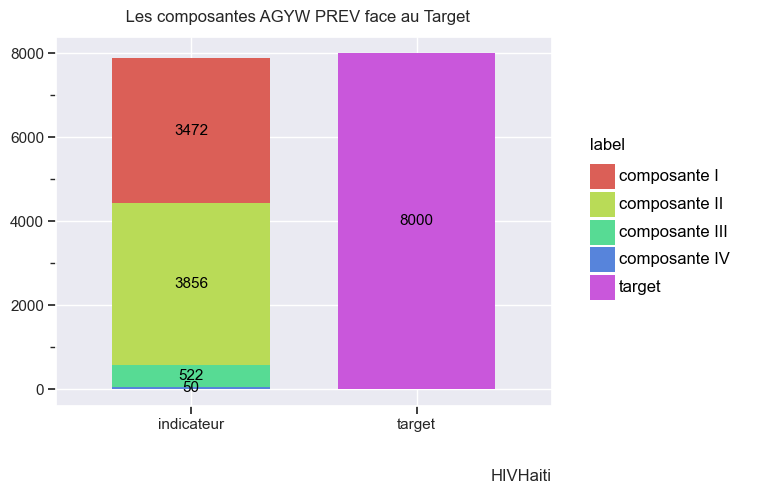

<ggplot: (317454973)>

/usr/local/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: ./table_results/all/composante_agywprev.png


In [6]:
target= 8000
stack_data = DataFrame( 
                  {     
                        "supp":["target","indicateur","indicateur","indicateur",'indicateur'],
                        "label": ["target","composante I","composante II","composante III", 'composante IV'],
                        "data": [target,datim.total_datimI,
                                datim.total_datimII,
                                datim.total_datimIII,datim.total_datimIV]
})

p = (ggplot(stack_data,aes(x="supp",y="data",fill="label",width=0.7)) 
 + geom_bar(position=position_stack(vjust=0.5),stat="identity")
 + geom_text(aes(label="data"),position=position_stack(vjust=0.5))
 + ggtitle(" Les composantes AGYW PREV face au Target")
 + xlab("")
 +ylab("")
 +labs(caption =  "HIVHaiti")
 + theme_seaborn()
)
p
ggsave(plot=p,filename="./table_results/all/composante_agywprev.png",dpi=100)

img = Image("./table_results/all/composante_agywprev.png")

In [7]:
wb = Workbook()
ws = wb.active
ws.title = elements.who_am_i

In [8]:
ws.merge_cells("A1:A2")
ws.cell(row=1, column=1).fill = blue_fill
ws.cell(row=1, column=1).border = medium_border
ws.cell(row=2, column=1).border = medium_border

######### age
ws.merge_cells("B1:C1")
ws.cell(row=1, column=2).fill = blue_fill
ws.cell(row=1, column=2).value = elements.age1014
ws.cell(row=1, column=2).font = bold_12_red
ws.cell(row=1, column=2).alignment = text_table
ws.cell(row=1, column=2).border = medium_border
ws.cell(row=1, column=3).border = medium_border

ws.merge_cells("D1:E1")
ws.cell(row=1, column=4).fill = blue_fill
ws.cell(row=1, column=4).value = elements.age1519
ws.cell(row=1, column=4).font = bold_12_red
ws.cell(row=1, column=4).alignment = text_table
ws.cell(row=1, column=4).border = medium_border
ws.cell(row=1, column=5).border = medium_border


ws.merge_cells("F1:G1")
ws.cell(row=1, column=6).fill = blue_fill
ws.cell(row=1, column=6).value = elements.age2024
ws.cell(row=1, column=6).font = bold_12_red
ws.cell(row=1, column=6).alignment = text_table
ws.cell(row=1, column=6).border = medium_border
ws.cell(row=1, column=7).border = medium_border

##################### status

ws.cell(row=2, column=2).fill = blue_fill
ws.cell(row=2, column=2).value = elements.status_int
ws.cell(row=2, column=2).font = bold_12
ws.cell(row=2, column=2).alignment = text_table
ws.cell(row=2, column=2).border = medium_border
ws.cell(row=2, column=2).border = medium_border

ws.cell(row=2, column=3).fill = blue_fill
ws.cell(row=2, column=3).value = elements.status_served
ws.cell(row=2, column=3).font = bold_12
ws.cell(row=2, column=3).alignment = text_table
ws.cell(row=2, column=3).border = medium_border
ws.cell(row=2, column=3).border = medium_border

ws.cell(row=2, column=4).fill = blue_fill
ws.cell(row=2, column=4).value = elements.status_int
ws.cell(row=2, column=4).font = bold_12
ws.cell(row=2, column=4).alignment = text_table
ws.cell(row=2, column=4).border = medium_border
ws.cell(row=2, column=4).border = medium_border

ws.cell(row=2, column=5).fill = blue_fill
ws.cell(row=2, column=5).value = elements.status_served
ws.cell(row=2, column=5).font = bold_12
ws.cell(row=2, column=5).alignment = text_table
ws.cell(row=2, column=5).border = medium_border
ws.cell(row=2, column=5).border = medium_border

ws.cell(row=2, column=6).fill = blue_fill
ws.cell(row=2, column=6).value = elements.status_int
ws.cell(row=2, column=6).font = bold_12
ws.cell(row=2, column=6).alignment = text_table
ws.cell(row=2, column=6).border = medium_border
ws.cell(row=2, column=6).border = medium_border

ws.cell(row=2, column=7).fill = blue_fill
ws.cell(row=2, column=7).value = elements.status_served
ws.cell(row=2, column=7).font = bold_12
ws.cell(row=2, column=7).alignment = text_table
ws.cell(row=2, column=7).border = medium_border
ws.cell(row=2, column=7).border = medium_border

In [9]:


################################## primary & service
ws.merge_cells("A3:A8")
ws.cell(row=3, column=1).fill = blue_fill
ws.cell(row=3,column=1).value = elements.primary_intervention
ws.cell(row=3,column=1).font = bold_12
ws.cell(row=3,column=1).alignment = text_table
ws.cell(row=3, column=1).border = medium_border
ws.cell(row=4, column=1).border = medium_border
ws.cell(row=5, column=1).border = medium_border
ws.cell(row=6, column=1).border = medium_border
ws.cell(row=7, column=1).border = medium_border
ws.cell(row=8, column=1).border = medium_border


ws.merge_cells("A9:A17")
ws.cell(row=9, column=1).fill = blue_fill
ws.cell(row=9,column=1).value = elements.secondary_intervention
ws.cell(row=9,column=1).font = bold_12
ws.cell(row=9,column=1).alignment = text_table
ws.cell(row=9, column=1).border = medium_border
ws.cell(row=10, column=1).border = medium_border
ws.cell(row=11, column=1).border = medium_border
ws.cell(row=12, column=1).border = medium_border
ws.cell(row=13, column=1).border = medium_border
ws.cell(row=14, column=1).border = medium_border
ws.cell(row=15, column=1).border = medium_border
ws.cell(row=16, column=1).border = medium_border
ws.cell(row=17, column=1).border = medium_border

#################### primary with data

##### curriculum & ps
ws.merge_cells("B3:B8")
ws.cell(row=3, column=2).fill = y_fill
ws.cell(row=3,column=2).value = elements.curriculum
ws.cell(row=3,column=2).font = bold_12_green
ws.cell(row=3,column=2).alignment = text_table
ws.cell(row=3, column=2).border = medium_border
ws.cell(row=4, column=2).border = medium_border
ws.cell(row=5, column=2).border = medium_border
ws.cell(row=6, column=2).border = medium_border
ws.cell(row=7, column=2).border = medium_border
ws.cell(row=8, column=2).border = medium_border

ws.merge_cells("C3:C8")
ws.cell(row=3, column=3).fill = lb_fill
ws.cell(row=3,column=3).value = data.curriculum_1014 if data.curriculum_1014 else 0
ws.cell(row=3,column=3).font = bold_12_red
ws.cell(row=3,column=3).alignment = text_table
ws.cell(row=3, column=3).border = medium_border
ws.cell(row=4, column=3).border = medium_border
ws.cell(row=5, column=3).border = medium_border
ws.cell(row=6, column=3).border = medium_border
ws.cell(row=7, column=3).border = medium_border
ws.cell(row=8, column=3).border = medium_border

######

ws.merge_cells("D3:D5")
ws.cell(row=3, column=4).fill = y_fill
ws.cell(row=3,column=4).value = elements.ps1519
ws.cell(row=3,column=4).font = bold_12_green
ws.cell(row=3,column=4).alignment = text_table
ws.cell(row=3, column=4).border = medium_border
ws.cell(row=4, column=4).border = medium_border
ws.cell(row=5, column=4).border = medium_border


ws.merge_cells("E3:E5")
ws.cell(row=3, column=5).fill = lb_fill
ws.cell(row=3,column=5).value = data.ps_1519 if data.ps_1519 else 0
ws.cell(row=3,column=5).font = bold_12_red
ws.cell(row=3,column=5).alignment = text_table
ws.cell(row=3, column=5).border = medium_border
ws.cell(row=4, column=5).border = medium_border
ws.cell(row=5, column=5).border = medium_border



ws.merge_cells("F3:F5")
ws.cell(row=3, column=6).fill = y_fill
ws.cell(row=3,column=6).value = elements.ps2024
ws.cell(row=3,column=6).font = bold_12_green
ws.cell(row=3,column=6).alignment = text_table
ws.cell(row=3, column=6).border = medium_border
ws.cell(row=4, column=6).border = medium_border
ws.cell(row=5, column=6).border = medium_border


ws.merge_cells("G3:G5")
ws.cell(row=3, column=7).fill = lb_fill
ws.cell(row=3,column=7).value = data.ps_2024 if data.ps_2024 else 0
ws.cell(row=3,column=7).font = bold_12_red
ws.cell(row=3,column=7).alignment = text_table
ws.cell(row=3, column=7).border = medium_border
ws.cell(row=4, column=7).border = medium_border
ws.cell(row=5, column=7).border = medium_border

##### curriculum


ws.cell(row=6, column=4).fill = lb_fill
ws.cell(row=6, column=4).value = elements.curriculum
ws.cell(row=6, column=4).font = bold_12_green
ws.cell(row=6, column=4).alignment = text_table
ws.cell(row=6, column=4).border = medium_border
ws.cell(row=6, column=4).border = medium_border

ws.cell(row=6, column=5).fill = lb_fill
ws.cell(row=6, column=5).value = data.curriculum_1519 if data.curriculum_1519 else 0
ws.cell(row=6, column=5).font = bold_12_red
ws.cell(row=6, column=5).alignment = text_table
ws.cell(row=6, column=5).border = medium_border
ws.cell(row=6, column=5).border = medium_border

ws.cell(row=6, column=6).fill = lb_fill
ws.cell(row=6, column=6).value = elements.curriculum
ws.cell(row=6, column=6).font = bold_12_green
ws.cell(row=6, column=6).alignment = text_table
ws.cell(row=6, column=6).border = medium_border
ws.cell(row=6, column=6).border = medium_border

ws.cell(row=6, column=7).fill = lb_fill
ws.cell(row=6, column=7).value = data.curriculum_2024 if data.curriculum_2024 else 0
ws.cell(row=6, column=7).font = bold_12_red
ws.cell(row=6, column=7).alignment = text_table
ws.cell(row=6, column=7).border = medium_border
ws.cell(row=6, column=7).border = medium_border

###### condoms

ws.merge_cells("D7:D8")
ws.cell(row=7, column=4).fill = lb_fill
ws.cell(row=7,column=4).value = elements.condoms
ws.cell(row=7,column=4).font = bold_12_green
ws.cell(row=7,column=4).alignment = text_table
ws.cell(row=7, column=4).border = medium_border
ws.cell(row=8, column=4).border = medium_border


ws.merge_cells("E7:E8")
ws.cell(row=7, column=5).fill = lb_fill
ws.cell(row=7,column=5).value = data.condom_1519 if data.condom_1519 else 0
ws.cell(row=7,column=5).font = bold_12_red
ws.cell(row=7,column=5).alignment = text_table
ws.cell(row=7, column=5).border = medium_border
ws.cell(row=8, column=5).border = medium_border


ws.merge_cells("F7:F8")
ws.cell(row=7, column=6).fill = lb_fill
ws.cell(row=7,column=6).value = elements.condoms
ws.cell(row=7,column=6).font = bold_12_green
ws.cell(row=7,column=6).alignment = text_table
ws.cell(row=7, column=6).border = medium_border
ws.cell(row=8, column=6).border = medium_border


ws.merge_cells("G7:G8")
ws.cell(row=7, column=7).fill = lb_fill
ws.cell(row=7,column=7).value = data.condom_2024 if data.condom_2024 else 0
ws.cell(row=7,column=7).font = bold_12_red
ws.cell(row=7,column=7).alignment = text_table
ws.cell(row=7, column=7).border = medium_border
ws.cell(row=8, column=7).border = medium_border

################################# secondary & services

#### Condom
ws.cell(row=9, column=2).fill = lb_fill
ws.cell(row=9, column=2).value = elements.condoms
ws.cell(row=9, column=2).font = bold_12_green
ws.cell(row=9, column=2).alignment = text_table
ws.cell(row=9, column=2).border = medium_border
ws.cell(row=9, column=2).border = medium_border

ws.cell(row=9, column=3).fill = lb_fill
ws.cell(row=9, column=3).value = data.condom_1014 if data.condom_1014 else 0
ws.cell(row=9, column=3).font = bold_12_red
ws.cell(row=9, column=3).alignment = text_table
ws.cell(row=9, column=3).border = medium_border
ws.cell(row=9, column=3).border = medium_border

#################### hts

ws.cell(row=10, column=2).fill = lb_fill
ws.cell(row=10, column=2).value = elements.hts
ws.cell(row=10, column=2).font = bold_12_green
ws.cell(row=10, column=2).alignment = text_table
ws.cell(row=10, column=2).border = medium_border
ws.cell(row=10, column=2).border = medium_border

ws.cell(row=10, column=3).fill = lb_fill
ws.cell(row=10, column=3).value = data.hts_1014 if data.hts_1014 else 0
ws.cell(row=10, column=3).font = bold_12_red
ws.cell(row=10, column=3).alignment = text_table
ws.cell(row=10, column=3).border = medium_border
ws.cell(row=10, column=3).border = medium_border

ws.merge_cells("D9:D10")
ws.cell(row=9, column=4).fill = lb_fill
ws.cell(row=9, column=4).value = elements.hts
ws.cell(row=9, column=4).font = bold_12_green
ws.cell(row=9, column=4).alignment = text_table
ws.cell(row=9, column=4).border = medium_border
ws.cell(row=10, column=4).border = medium_border


ws.merge_cells("E9:E10")
ws.cell(row=9, column=5).fill = lb_fill
ws.cell(row=9, column=5).value = data.hts_1519 if data.hts_1519 else 0
ws.cell(row=9, column=5).font = bold_12_red
ws.cell(row=9, column=5).alignment = text_table
ws.cell(row=9, column=5).border = medium_border
ws.cell(row=10, column=5).border = medium_border

ws.merge_cells("F9:F10")
ws.cell(row=9, column=6).fill = lb_fill
ws.cell(row=9, column=6).value = elements.hts
ws.cell(row=9, column=6).font = bold_12_green
ws.cell(row=9, column=6).alignment = text_table
ws.cell(row=9, column=6).border = medium_border
ws.cell(row=10, column=6).border = medium_border

ws.merge_cells("G9:G10")
ws.cell(row=9, column=7).fill = lb_fill
ws.cell(row=9, column=7).value = data.hts_2024 if data.hts_2024 else 0
ws.cell(row=9, column=7).font = bold_12_red
ws.cell(row=9, column=7).alignment = text_table
ws.cell(row=9, column=7).border = medium_border
ws.cell(row=10, column=7).border = medium_border

################# vbg

ws.cell(row=11, column=2).fill = lb_fill
ws.cell(row=11, column=2).value = elements.vbg
ws.cell(row=11, column=2).font = bold_12_green
ws.cell(row=11, column=2).alignment = text_table
ws.cell(row=11, column=2).border = medium_border
ws.cell(row=11, column=2).border = medium_border

ws.cell(row=11, column=3).fill = lb_fill
ws.cell(row=11, column=3).value = data.vbg_1014 if data.vbg_1014 else 0
ws.cell(row=11, column=3).font = bold_12_red
ws.cell(row=11, column=3).alignment = text_table
ws.cell(row=11, column=3).border = medium_border
ws.cell(row=11, column=3).border = medium_border

ws.cell(row=11, column=4).fill = lb_fill
ws.cell(row=11, column=4).value = elements.vbg
ws.cell(row=11, column=4).font = bold_12_green
ws.cell(row=11, column=4).alignment = text_table
ws.cell(row=11, column=4).border = medium_border
ws.cell(row=11, column=4).border = medium_border

ws.cell(row=11, column=5).fill = lb_fill
ws.cell(row=11, column=5).value = data.vbg_1519 if data.vbg_1519 else 0
ws.cell(row=11, column=5).font = bold_12_red
ws.cell(row=11, column=5).alignment = text_table
ws.cell(row=11, column=5).border = medium_border
ws.cell(row=11, column=5).border = medium_border

ws.cell(row=11, column=6).fill = lb_fill
ws.cell(row=11, column=6).value = elements.vbg
ws.cell(row=11, column=6).font = bold_12_green
ws.cell(row=11, column=6).alignment = text_table
ws.cell(row=11, column=6).border = medium_border
ws.cell(row=11, column=6).border = medium_border

ws.cell(row=11, column=7).fill = lb_fill
ws.cell(row=11, column=7).value = data.vbg_2024 if data.vbg_2024 else 0
ws.cell(row=11, column=7).font = bold_12_red
ws.cell(row=11, column=7).alignment = text_table
ws.cell(row=11, column=7).border = medium_border
ws.cell(row=11, column=7).border = medium_border

############# gyneco

ws.cell(row=12, column=2).fill = lb_fill
ws.cell(row=12, column=2).value = elements.gyneco
ws.cell(row=12, column=2).font = bold_12_green
ws.cell(row=12, column=2).alignment = text_table
ws.cell(row=12, column=2).border = medium_border
ws.cell(row=12, column=2).border = medium_border

ws.cell(row=12, column=3).fill = lb_fill
ws.cell(row=12, column=3).value = data.gyneco_1014 if data.gyneco_1014 else 0
ws.cell(row=12, column=3).font = bold_12_red
ws.cell(row=12, column=3).alignment = text_table
ws.cell(row=12, column=3).border = medium_border
ws.cell(row=12, column=3).border = medium_border

ws.cell(row=12, column=4).fill = lb_fill
ws.cell(row=12, column=4).value = elements.gyneco
ws.cell(row=12, column=4).font = bold_12_green
ws.cell(row=12, column=4).alignment = text_table
ws.cell(row=12, column=4).border = medium_border
ws.cell(row=12, column=4).border = medium_border

ws.cell(row=12, column=5).fill = lb_fill
ws.cell(row=12, column=5).value = data.gyneco_1519 if data.gyneco_1519 else 0
ws.cell(row=12, column=5).font = bold_12_red
ws.cell(row=12, column=5).alignment = text_table
ws.cell(row=12, column=5).border = medium_border
ws.cell(row=12, column=5).border = medium_border

ws.cell(row=12, column=6).fill = lb_fill
ws.cell(row=12, column=6).value = elements.gyneco
ws.cell(row=12, column=6).font = bold_12_green
ws.cell(row=12, column=6).alignment = text_table
ws.cell(row=12, column=6).border = medium_border
ws.cell(row=12, column=6).border = medium_border

ws.cell(row=12, column=7).fill = lb_fill
ws.cell(row=12, column=7).value = data.gyneco_2024 if data.gyneco_2024 else 0
ws.cell(row=12, column=7).font = bold_12_red
ws.cell(row=12, column=7).alignment = text_table
ws.cell(row=12, column=7).border = medium_border
ws.cell(row=12, column=7).border = medium_border


#########
ws.cell(row=13, column=2).fill = lb_fill
ws.cell(row=13, column=2).value = elements.schooling
ws.cell(row=13, column=2).font = bold_12_green
ws.cell(row=13, column=2).alignment = text_table
ws.cell(row=13, column=2).border = medium_border
ws.cell(row=13, column=2).border = medium_border

ws.cell(row=13, column=3).fill = lb_fill
ws.cell(row=13, column=3).value = data.schooling_1014 if data.schooling_1014 else 0
ws.cell(row=13, column=3).font = bold_12_red
ws.cell(row=13, column=3).alignment = text_table
ws.cell(row=13, column=3).border = medium_border
ws.cell(row=13, column=3).border = medium_border

ws.cell(row=13, column=4).fill = lb_fill
ws.cell(row=13, column=4).value = elements.schooling
ws.cell(row=13, column=4).font = bold_12_green
ws.cell(row=13, column=4).alignment = text_table
ws.cell(row=13, column=4).border = medium_border
ws.cell(row=13, column=4).border = medium_border

ws.cell(row=13, column=5).fill = lb_fill
ws.cell(row=13, column=5).value = data.schooling_1519 if data.schooling_1519 else 0
ws.cell(row=13, column=5).font = bold_12_red
ws.cell(row=13, column=5).alignment = text_table
ws.cell(row=13, column=5).border = medium_border
ws.cell(row=13, column=5).border = medium_border

ws.cell(row=13, column=6).fill = lb_fill
ws.cell(row=13, column=6).value = elements.schooling
ws.cell(row=13, column=6).font = bold_12_green
ws.cell(row=13, column=6).alignment = text_table
ws.cell(row=13, column=6).border = medium_border
ws.cell(row=13, column=6).border = medium_border

ws.cell(row=13, column=7).fill = lb_fill
ws.cell(row=13, column=7).value = data.schooling_2024 if data.schooling_2024 else 0
ws.cell(row=13, column=7).font = bold_12_red
ws.cell(row=13, column=7).alignment = text_table
ws.cell(row=13, column=7).border = medium_border
ws.cell(row=13, column=7).border = medium_border

##############
ws.cell(row=14, column=2).fill = lb_fill
ws.cell(row=14, column=2).value = elements.parenting
ws.cell(row=14, column=2).font = bold_12_green
ws.cell(row=14, column=2).alignment = text_table
ws.cell(row=14, column=2).border = medium_border
ws.cell(row=14, column=2).border = medium_border

ws.cell(row=14, column=3).fill = lb_fill
ws.cell(row=14, column=3).value = data.parenting_1014 if data.parenting_1014 else 0
ws.cell(row=14, column=3).font = bold_12_red
ws.cell(row=14, column=3).alignment = text_table
ws.cell(row=14, column=3).border = medium_border
ws.cell(row=14, column=3).border = medium_border

ws.cell(row=14, column=4).fill = lb_fill
ws.cell(row=14, column=4).value = elements.parenting
ws.cell(row=14, column=4).font = bold_12_green
ws.cell(row=14, column=4).alignment = text_table
ws.cell(row=14, column=4).border = medium_border
ws.cell(row=14, column=4).border = medium_border

ws.cell(row=14, column=5).fill = lb_fill
ws.cell(row=14, column=5).value = data.parenting_1519 if data.parenting_1519 else 0
ws.cell(row=14, column=5).font = bold_12_red
ws.cell(row=14, column=5).alignment = text_table
ws.cell(row=14, column=5).border = medium_border
ws.cell(row=14, column=5).border = medium_border

ws.cell(row=14, column=6).fill = lb_fill
ws.cell(row=14, column=6).value = elements.parenting
ws.cell(row=14, column=6).font = bold_12_green
ws.cell(row=14, column=6).alignment = text_table
ws.cell(row=14, column=6).border = medium_border
ws.cell(row=14, column=6).border = medium_border

ws.cell(row=14, column=7).fill = lb_fill
ws.cell(row=14, column=7).value = data.parenting_2024 if data.parenting_2024 else 0
ws.cell(row=14, column=7).font = bold_12_red
ws.cell(row=14, column=7).alignment = text_table
ws.cell(row=14, column=7).border = medium_border
ws.cell(row=14, column=7).border = medium_border
#############
ws.cell(row=15, column=2).fill = lb_fill
ws.cell(row=15, column=2).value = elements.socioeco
ws.cell(row=15, column=2).font = bold_12_green
ws.cell(row=15, column=2).alignment = text_table
ws.cell(row=15, column=2).border = medium_border
ws.cell(row=15, column=2).border = medium_border

ws.cell(row=15, column=3).fill = lb_fill
ws.cell(row=15, column=3).value = data.socioeco_app_1014 if data.socioeco_app_1014 else 0
ws.cell(row=15, column=3).font = bold_12_red
ws.cell(row=15, column=3).alignment = text_table
ws.cell(row=15, column=3).border = medium_border
ws.cell(row=15, column=3).border = medium_border

ws.cell(row=15, column=4).fill = lb_fill
ws.cell(row=15, column=4).value = elements.socioeco
ws.cell(row=15, column=4).font = bold_12_green
ws.cell(row=15, column=4).alignment = text_table
ws.cell(row=15, column=4).border = medium_border
ws.cell(row=15, column=4).border = medium_border

ws.cell(row=15, column=5).fill = lb_fill
ws.cell(row=15, column=5).value = data.socioeco_app_1519 if data.socioeco_app_1519 else 0
ws.cell(row=15, column=5).font = bold_12_red
ws.cell(row=15, column=5).alignment = text_table
ws.cell(row=15, column=5).border = medium_border
ws.cell(row=15, column=5).border = medium_border

ws.cell(row=15, column=6).fill = lb_fill
ws.cell(row=15, column=6).value = elements.socioeco
ws.cell(row=15, column=6).font = bold_12_green
ws.cell(row=15, column=6).alignment = text_table
ws.cell(row=15, column=6).border = medium_border
ws.cell(row=15, column=6).border = medium_border

ws.cell(row=15, column=7).fill = lb_fill
ws.cell(row=15, column=7).value = data.socioeco_app_2024 if data.socioeco_app_2024 else 0
ws.cell(row=15, column=7).font = bold_12_red
ws.cell(row=15, column=7).alignment = text_table
ws.cell(row=15, column=7).border = medium_border
ws.cell(row=15, column=7).border = medium_border

#######
ws.cell(row=16, column=2).fill = lb_fill
ws.cell(row=16, column=2).value = elements.contraceptive
ws.cell(row=16, column=2).font = bold_12_green
ws.cell(row=16, column=2).alignment = text_table
ws.cell(row=16, column=2).border = medium_border
ws.cell(row=16, column=2).border = medium_border

ws.cell(row=16, column=3).fill = lb_fill
ws.cell(row=16, column=3).value = data.contraceptive_1014 if data.contraceptive_1014 else 0
ws.cell(row=16, column=3).font = bold_12_red
ws.cell(row=16, column=3).alignment = text_table
ws.cell(row=16, column=3).border = medium_border
ws.cell(row=16, column=3).border = medium_border

ws.cell(row=16, column=4).fill = lb_fill
ws.cell(row=16, column=4).value = elements.contraceptive
ws.cell(row=16, column=4).font = bold_12_green
ws.cell(row=16, column=4).alignment = text_table
ws.cell(row=16, column=4).border = medium_border
ws.cell(row=16, column=4).border = medium_border

ws.cell(row=16, column=5).fill = lb_fill
ws.cell(row=16, column=5).value = data.contraceptive_1519 if data.contraceptive_1519 else 0
ws.cell(row=16, column=5).font = bold_12_red
ws.cell(row=16, column=5).alignment = text_table
ws.cell(row=16, column=5).border = medium_border
ws.cell(row=16, column=5).border = medium_border

ws.cell(row=16, column=6).fill = lb_fill
ws.cell(row=16, column=6).value = elements.contraceptive
ws.cell(row=16, column=6).font = bold_12_green
ws.cell(row=16, column=6).alignment = text_table
ws.cell(row=16, column=6).border = medium_border
ws.cell(row=16, column=6).border = medium_border

ws.cell(row=16, column=7).fill = lb_fill
ws.cell(row=16, column=7).value = data.contraceptive_2024 if data.contraceptive_2024 else 0
ws.cell(row=16, column=7).font = bold_12_red
ws.cell(row=16, column=7).alignment = text_table
ws.cell(row=16, column=7).border = medium_border
ws.cell(row=16, column=7).border = medium_border

########

ws.cell(row=17, column=2).fill = lb_fill
ws.cell(row=17, column=2).value = elements.prep
ws.cell(row=17, column=2).font = bold_12_green
ws.cell(row=17, column=2).alignment = text_table
ws.cell(row=17, column=2).border = medium_border
ws.cell(row=17, column=2).border = medium_border

ws.cell(row=17, column=3).fill = lb_fill
ws.cell(row=17, column=3).value = data.prep_1014 if data.prep_1014 else 0
ws.cell(row=17, column=3).font = bold_12_red
ws.cell(row=17, column=3).alignment = text_table
ws.cell(row=17, column=3).border = medium_border
ws.cell(row=17, column=3).border = medium_border

ws.cell(row=17, column=4).fill = lb_fill
ws.cell(row=17, column=4).value = elements.prep
ws.cell(row=17, column=4).font = bold_12_green
ws.cell(row=17, column=4).alignment = text_table
ws.cell(row=17, column=4).border = medium_border
ws.cell(row=17, column=4).border = medium_border

ws.cell(row=17, column=5).fill = lb_fill
ws.cell(row=17, column=5).value = data.prep_1519 if data.prep_1519 else 0
ws.cell(row=17, column=5).font = bold_12_red
ws.cell(row=17, column=5).alignment = text_table
ws.cell(row=17, column=5).border = medium_border
ws.cell(row=17, column=5).border = medium_border

ws.cell(row=17, column=6).fill = lb_fill
ws.cell(row=17, column=6).value = elements.prep
ws.cell(row=17, column=6).font = bold_12_green
ws.cell(row=17, column=6).alignment = text_table
ws.cell(row=17, column=6).border = medium_border
ws.cell(row=17, column=6).border = medium_border

ws.cell(row=17, column=7).fill = lb_fill
ws.cell(row=17, column=7).value = data.prep_2024 if data.prep_2024 else 0
ws.cell(row=17, column=7).font = bold_12_red
ws.cell(row=17, column=7).alignment = text_table
ws.cell(row=17, column=7).border = medium_border
ws.cell(row=17, column=7).border = medium_border




In [10]:

#### socioeco:  Muso et Jardinage
ws.merge_cells("A19:A20")
ws.cell(row=19, column=1).fill = blue_fill
ws.cell(row=19,column=1).value = elements.socioeco
ws.cell(row=19,column=1).font = bold_12
ws.cell(row=19,column=1).alignment = text_table
ws.cell(row=19, column=1).border = medium_border
ws.cell(row=20, column=1).border = medium_border



ws.cell(row=19, column=2).fill = lb_fill
ws.cell(row=19, column=2).value = elements.muso
ws.cell(row=19, column=2).font = bold_12_green
ws.cell(row=19, column=2).alignment = text_table
ws.cell(row=19, column=2).border = medium_border
ws.cell(row=19, column=2).border = medium_border

ws.cell(row=19, column=3).fill = lb_fill
ws.cell(row=19, column=3).value = data.muso_1014 if data.muso_1014 else 0
ws.cell(row=19, column=3).font = bold_12_red
ws.cell(row=19, column=3).alignment = text_table
ws.cell(row=19, column=3).border = medium_border
ws.cell(row=19, column=3).border = medium_border

ws.cell(row=19, column=4).fill = lb_fill
ws.cell(row=19, column=4).value = elements.muso
ws.cell(row=19, column=4).font = bold_12_green
ws.cell(row=19, column=4).alignment = text_table
ws.cell(row=19, column=4).border = medium_border
ws.cell(row=19, column=4).border = medium_border

ws.cell(row=19, column=5).fill = lb_fill
ws.cell(row=19, column=5).value = data.muso_1519 if data.muso_1519 else 0
ws.cell(row=19, column=5).font = bold_12_red
ws.cell(row=19, column=5).alignment = text_table
ws.cell(row=19, column=5).border = medium_border
ws.cell(row=19, column=5).border = medium_border

ws.cell(row=19, column=6).fill = lb_fill
ws.cell(row=19, column=6).value = elements.muso
ws.cell(row=19, column=6).font = bold_12_green
ws.cell(row=19, column=6).alignment = text_table
ws.cell(row=19, column=6).border = medium_border
ws.cell(row=19, column=6).border = medium_border

ws.cell(row=19, column=7).fill = lb_fill
ws.cell(row=19, column=7).value = data.muso_2024 if data.muso_2024 else 0
ws.cell(row=19, column=7).font = bold_12_red
ws.cell(row=19, column=7).alignment = text_table
ws.cell(row=19, column=7).border = medium_border
ws.cell(row=19, column=7).border = medium_border


ws.cell(row=20, column=2).fill = lb_fill
ws.cell(row=20, column=2).value = elements.gardening
ws.cell(row=20, column=2).font = bold_12_green
ws.cell(row=20, column=2).alignment = text_table
ws.cell(row=20, column=2).border = medium_border
ws.cell(row=20, column=2).border = medium_border

ws.cell(row=20, column=3).fill = lb_fill
ws.cell(row=20, column=3).value = data.gardening_1014 if data.gardening_1014 else 0
ws.cell(row=20, column=3).font = bold_12_red
ws.cell(row=20, column=3).alignment = text_table
ws.cell(row=20, column=3).border = medium_border
ws.cell(row=20, column=3).border = medium_border

ws.cell(row=20, column=4).fill = lb_fill
ws.cell(row=20, column=4).value = elements.gardening
ws.cell(row=20, column=4).font = bold_12_green
ws.cell(row=20, column=4).alignment = text_table
ws.cell(row=20, column=4).border = medium_border
ws.cell(row=20, column=4).border = medium_border

ws.cell(row=20, column=5).fill = lb_fill
ws.cell(row=20, column=5).value = data.gardening_1519 if data.gardening_1519 else 0
ws.cell(row=20, column=5).font = bold_12_red
ws.cell(row=20, column=5).alignment = text_table
ws.cell(row=20, column=5).border = medium_border
ws.cell(row=20, column=5).border = medium_border

ws.cell(row=20, column=6).fill = lb_fill
ws.cell(row=20, column=6).value = elements.gardening
ws.cell(row=20, column=6).font = bold_12_green
ws.cell(row=20, column=6).alignment = text_table
ws.cell(row=20, column=6).border = medium_border
ws.cell(row=20, column=6).border = medium_border

ws.cell(row=20, column=7).fill = lb_fill
ws.cell(row=20, column=7).value = data.gardening_2024 if data.gardening_2024 else 0
ws.cell(row=20, column=7).font = bold_12_red
ws.cell(row=20, column=7).alignment = text_table
ws.cell(row=20, column=7).border = medium_border
ws.cell(row=20, column=7).border = medium_border





In [11]:
%%capture
## Base
base_df = dataframe_to_rows(base_table,index=False,header=True)
for ridx, row in enumerate(base_df,1):
    for cidx, value in enumerate(row,1):
        cells = ws.cell(ridx,cidx+10,value)
        cells.border = medium_border
        cells

ws.cell(row=1,column=11).fill = blue_fill 
ws.cell(row=1,column=11).font = bold_12_red 
ws.cell(row=1,column=11).alignment = text_table 
ws.cell(row=1,column=12).fill = blue_fill 
ws.cell(row=1,column=12).font = bold_12_red
ws.cell(row=1,column=12).alignment = text_table 
ws.cell(row=1,column=13).fill = blue_fill 
ws.cell(row=1,column=13).font = bold_12_red
ws.cell(row=1,column=13).alignment = text_table 
ws.cell(row=1,column=14).fill = blue_fill 
ws.cell(row=1,column=14).font = bold_12_red 
ws.cell(row=1,column=14).alignment = text_table
ws.cell(row=1,column=15).fill = blue_fill 
ws.cell(row=1,column=15).font = bold_12_red
ws.cell(row=1,column=15).alignment = text_table 
 
ws.cell(row=2,column=11).fill = lb_fill 
ws.cell(row=2,column=11).font = bold_12_red 
ws.cell(row=2,column=11).alignment = text_table 
ws.cell(row=2,column=12).fill = lb_fill 
ws.cell(row=2,column=12).font = bold_12_red
ws.cell(row=2,column=12).alignment = text_table 
ws.cell(row=2,column=13).fill = lb_fill 
ws.cell(row=2,column=13).font = bold_12_red
ws.cell(row=2,column=13).alignment = text_table 
ws.cell(row=2,column=14).fill = lb_fill 
ws.cell(row=2,column=14).font = bold_12_red 
ws.cell(row=2,column=14).alignment = text_table
ws.cell(row=2,column=15).fill = lb_fill 
ws.cell(row=2,column=15).font = bold_12_red
ws.cell(row=2,column=15).alignment = text_table 

ws.cell(row=3,column=11).fill = lb_fill 
ws.cell(row=3,column=11).font = bold_12_red 
ws.cell(row=3,column=11).alignment = text_table 
ws.cell(row=3,column=12).fill = lb_fill 
ws.cell(row=3,column=12).font = bold_12_red
ws.cell(row=3,column=12).alignment = text_table 
ws.cell(row=3,column=13).fill = lb_fill 
ws.cell(row=3,column=13).font = bold_12_red
ws.cell(row=3,column=13).alignment = text_table 
ws.cell(row=3,column=14).fill = lb_fill 
ws.cell(row=3,column=14).font = bold_12_red 
ws.cell(row=3,column=14).alignment = text_table
ws.cell(row=3,column=15).fill = lb_fill 
ws.cell(row=3,column=15).font = bold_12_red
ws.cell(row=3,column=15).alignment = text_table 


ws.cell(row=4,column=11).fill = lb_fill 
ws.cell(row=4,column=11).font = bold_12_red 
ws.cell(row=4,column=11).alignment = text_table 
ws.cell(row=4,column=12).fill = lb_fill 
ws.cell(row=4,column=12).font = bold_12_red
ws.cell(row=4,column=12).alignment = text_table 
ws.cell(row=4,column=13).fill = lb_fill 
ws.cell(row=4,column=13).font = bold_12_red
ws.cell(row=4,column=13).alignment = text_table 
ws.cell(row=4,column=14).fill = lb_fill 
ws.cell(row=4,column=14).font = bold_12_red 
ws.cell(row=4,column=14).alignment = text_table
ws.cell(row=4,column=15).fill = lb_fill 
ws.cell(row=4,column=15).font = bold_12_red
ws.cell(row=4,column=15).alignment = text_table 
######



In [12]:
#### Load the indicator image componantes
ws.add_image(img,'S4')

In [13]:
%%capture
## Base
comp_df = dataframe_to_rows(comp_def_table,index=False,header=True)
for ridx, row in enumerate(comp_df,1):
    for cidx, value in enumerate(row,1):
        cells = ws.cell(ridx+7,cidx+19,value)
        cells.border = medium_border
        cells

ws.cell(row=8,column=20).fill = blue_fill 
ws.cell(row=8,column=20).font = bold_12_red 
ws.cell(row=8,column=20).alignment = text_table 
ws.cell(row=9,column=20).fill = lb_fill 
ws.cell(row=9,column=20).font = bold_12_red
ws.cell(row=9,column=20).alignment = text_table 

ws.cell(row=8,column=21).fill = blue_fill 
ws.cell(row=8,column=21).font = bold_12_red 
ws.cell(row=8,column=21).alignment = text_table 
ws.cell(row=9,column=21).fill = lb_fill 
ws.cell(row=9,column=21).font = bold_12_red
ws.cell(row=9,column=21).alignment = text_table 

ws.cell(row=8,column=22).fill = blue_fill 
ws.cell(row=8,column=22).font = bold_12_red 
ws.cell(row=8,column=22).alignment = text_table 
ws.cell(row=9,column=22).fill = lb_fill 
ws.cell(row=9,column=22).font = bold_12_red
ws.cell(row=9,column=22).alignment = text_table 

ws.cell(row=8,column=23).fill = blue_fill 
ws.cell(row=8,column=23).font = bold_12_red 
ws.cell(row=8,column=23).alignment = text_table 
ws.cell(row=9,column=23).fill = lb_fill 
ws.cell(row=9,column=23).font = bold_12_red
ws.cell(row=9,column=23).alignment = text_table 

 


In [14]:
# total titles
ws.cell(row=6, column=11).fill = blue_fill
ws.cell(row=6,column=11).value = elements.package
ws.cell(row=6,column=11).font = bold_12
ws.cell(row=6,column=11).alignment = text_table
ws.cell(row=6, column=11).border = medium_border

ws.cell(row=7, column=11).fill = blue_fill
ws.cell(row=7,column=11).value = elements.curriculum
ws.cell(row=7,column=11).font = bold_12
ws.cell(row=7,column=11).alignment = text_table
ws.cell(row=7, column=11).border = medium_border

ws.cell(row=8, column=11).fill = blue_fill
ws.cell(row=8,column=11).value = elements.condoms
ws.cell(row=8,column=11).font = bold_12
ws.cell(row=8,column=11).alignment = text_table
ws.cell(row=8, column=11).border = medium_border

ws.cell(row=9, column=11).fill = blue_fill
ws.cell(row=9,column=11).value = elements.hts
ws.cell(row=9,column=11).font = bold_12
ws.cell(row=9,column=11).alignment = text_table
ws.cell(row=9, column=11).border = medium_border

ws.cell(row=10, column=11).fill = blue_fill
ws.cell(row=10,column=11).value = elements.schooling
ws.cell(row=10,column=11).font = bold_12
ws.cell(row=10,column=11).alignment = text_table
ws.cell(row=10, column=11).border = medium_border

ws.cell(row=11, column=11).fill = blue_fill
ws.cell(row=11,column=11).value = elements.gardening
ws.cell(row=11,column=11).font = bold_12
ws.cell(row=11,column=11).alignment = text_table
ws.cell(row=11, column=11).border = medium_border


ws.cell(row=12, column=11).fill = blue_fill
ws.cell(row=12,column=11).value = elements.muso
ws.cell(row=12,column=11).font = bold_12
ws.cell(row=12,column=11).alignment = text_table
ws.cell(row=12, column=11).border = medium_border

ws.cell(row=13, column=11).fill = blue_fill
ws.cell(row=13,column=11).value = elements.socioeco
ws.cell(row=13,column=11).font = bold_12
ws.cell(row=13,column=11).alignment = text_table
ws.cell(row=13, column=11).border = medium_border

ws.cell(row=14, column=11).fill = blue_fill
ws.cell(row=14,column=11).value = elements.contraceptive
ws.cell(row=14,column=11).font = bold_12
ws.cell(row=14,column=11).alignment = text_table
ws.cell(row=14, column=11).border = medium_border

ws.cell(row=15, column=11).fill = blue_fill
ws.cell(row=15,column=11).value = elements.prep
ws.cell(row=15,column=11).font = bold_12
ws.cell(row=15,column=11).alignment = text_table
ws.cell(row=15, column=11).border = medium_border

ws.cell(row=16, column=11).fill = blue_fill
ws.cell(row=16,column=11).value = elements.vbg
ws.cell(row=16,column=11).font = bold_12
ws.cell(row=16,column=11).alignment = text_table
ws.cell(row=16, column=11).border = medium_border

ws.cell(row=17, column=11).fill = blue_fill
ws.cell(row=17,column=11).value = elements.gyneco
ws.cell(row=17,column=11).font = bold_12
ws.cell(row=17,column=11).alignment = text_table
ws.cell(row=17, column=11).border = medium_border

ws.cell(row=18, column=11).fill = blue_fill
ws.cell(row=18,column=11).value = elements.parenting
ws.cell(row=18,column=11).font = bold_12
ws.cell(row=18,column=11).alignment = text_table
ws.cell(row=18, column=11).border = medium_border


In [15]:
# total totales
ws.cell(row=6, column=12).fill = lb_fill
ws.cell(row=6,column=12).value = totals.package
ws.cell(row=6,column=12).font = bold_12_red
ws.cell(row=6,column=12).alignment = text_table
ws.cell(row=6, column=12).border = medium_border

ws.cell(row=7, column=12).fill = lb_fill
ws.cell(row=7,column=12).value = totals.curriculum
ws.cell(row=7,column=12).font = bold_12_red
ws.cell(row=7,column=12).alignment = text_table
ws.cell(row=7, column=12).border = medium_border

ws.cell(row=8, column=12).fill = lb_fill
ws.cell(row=8,column=12).value = totals.condoms
ws.cell(row=8,column=12).font = bold_12_red
ws.cell(row=8,column=12).alignment = text_table
ws.cell(row=8, column=12).border = medium_border

ws.cell(row=9, column=12).fill = lb_fill
ws.cell(row=9,column=12).value = totals.hts
ws.cell(row=9,column=12).font = bold_12_red
ws.cell(row=9,column=12).alignment = text_table
ws.cell(row=9, column=12).border = medium_border

ws.cell(row=10, column=12).fill = lb_fill
ws.cell(row=10,column=12).value = totals.schooling
ws.cell(row=10,column=12).font = bold_12_red
ws.cell(row=10,column=12).alignment = text_table
ws.cell(row=10, column=12).border = medium_border

ws.cell(row=11, column=12).fill = lb_fill
ws.cell(row=11,column=12).value = totals.gardening
ws.cell(row=11,column=12).font = bold_12_red
ws.cell(row=11,column=12).alignment = text_table
ws.cell(row=11, column=12).border = medium_border


ws.cell(row=12, column=12).fill = lb_fill
ws.cell(row=12,column=12).value = totals.muso
ws.cell(row=12,column=12).font = bold_12_red
ws.cell(row=12,column=12).alignment = text_table
ws.cell(row=12, column=12).border = medium_border

ws.cell(row=13, column=12).fill = lb_fill
ws.cell(row=13,column=12).value = totals.socioeco
ws.cell(row=13,column=12).font = bold_12_red
ws.cell(row=13,column=12).alignment = text_table
ws.cell(row=13, column=12).border = medium_border

ws.cell(row=14, column=12).fill = lb_fill
ws.cell(row=14,column=12).value = totals.contraceptive
ws.cell(row=14,column=12).font = bold_12_red
ws.cell(row=14,column=12).alignment = text_table
ws.cell(row=14, column=12).border = medium_border

ws.cell(row=15, column=12).fill = lb_fill
ws.cell(row=15,column=12).value = totals.prep
ws.cell(row=15,column=12).font = bold_12_red
ws.cell(row=15,column=12).alignment = text_table
ws.cell(row=15, column=12).border = medium_border

ws.cell(row=16, column=12).fill = lb_fill
ws.cell(row=16,column=12).value = totals.vbg
ws.cell(row=16,column=12).font = bold_12_red
ws.cell(row=16,column=12).alignment = text_table
ws.cell(row=16, column=12).border = medium_border

ws.cell(row=17, column=12).fill = lb_fill
ws.cell(row=17,column=12).value = totals.gyneco
ws.cell(row=17,column=12).font = bold_12_red
ws.cell(row=17,column=12).alignment = text_table
ws.cell(row=17, column=12).border = medium_border

ws.cell(row=18, column=12).fill = lb_fill
ws.cell(row=18,column=12).value = totals.parenting
ws.cell(row=18,column=12).font = bold_12_red
ws.cell(row=18,column=12).alignment = text_table
ws.cell(row=18, column=12).border = medium_border


In [ ]:
wb.save(f"./table_results/all/layeringTableIntern.xlsx")
#wb.save(f"./table_results/all/layeringTableIntern_{date_du_jour}.xlsx")
#wb.save(f"./table_results/ONFY21/layeringTableIntern.xlsx")
#wb.save(f"./table_results/Q1/layeringTableIntern_{date_du_jour}.xlsx")
#wb.save(f"./table_results/Q2/layeringTableIntern_{date_du_jour}.xlsx")
#wb.save(f"./table_results/Q3/layeringTableIntern_{date_du_jour}.xlsx")